In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
%cd C:\\Users\\sebsa\\Documents\\Centrale Paris\\3A\\OEN\\Projet Synthese\\data

C:\Users\sebsa\Documents\Centrale Paris\3A\OEN\Projet Synthese\data


## Read and format data

## Power Plants

In [3]:
all_powerplants = []
nb_total_files = 0

Solar real

In [4]:
path = 'installed_capacity/Solar/'
files_powerplants = os.listdir(path)
nb_Solar_real = 0
files_powerplants

['CH_solar_filtered_1.csv',
 'DE_solar_filtered_1.csv',
 'DK_solar_filtered_1.csv',
 'FR_solar_filtered_1.csv',
 'PL_solar_filtered_1.csv',
 'randm_gen']

In [5]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    df = pd.read_csv(path+name, index_col=0)
    out = df[cols]
    out['real_or_random_generated'] = 'real'
    all_powerplants.append(out)
    nb_total_files += 1
    nb_Solar_real += 1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,14,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
print(len(pd.concat(all_powerplants)))

1751688


In [7]:
assert(nb_total_files == len(all_powerplants))

Solar random generation

In [8]:
path = 'installed_capacity/Solar/randm_gen/'
files_powerplants = os.listdir(path)
nb_Solar_rdm = 0
files_powerplants

['BE_N.csv',
 'BE_S.csv',
 'ES_center.csv',
 'ES_N.csv',
 'ES_S.csv',
 'IT_center.csv',
 'IT_NE.csv',
 'IT_NW.csv',
 'IT_sardegna.csv',
 'IT_SE.csv',
 'IT_sicilia.csv',
 'UK_E.csv',
 'UK_SE.csv',
 'UK_SW.csv',
 'UK_W.csv']

In [9]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    df = pd.read_csv(path+name, index_col=0)
    out = df[cols]
    out['real_or_random_generated'] = 'random'
    all_powerplants.append(out)
    nb_total_files += 1
    nb_Solar_rdm += 1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
assert(nb_total_files == len(all_powerplants))

Wind

In [11]:
path = 'installed_capacity/Wind/'
files_powerplants = os.listdir(path)
nb_Wind = 0
files_powerplants

['eufarms_all.csv', 'eufarms_withGPS.csv', 'Extraction The Wind Power']

In [12]:
df = pd.read_csv(path+'eufarms_withGPS.csv', index_col=0)
df.head()

,Wind farm name,Total nominal power,Latitude,Longitude
0,Achaia,2000.0,37.969972,21.910000
1,Aghios Kyrillos,7200.0,34.979111,24.912500
2,Agios Athanasios,6800.0,40.829056,21.542833
3,Agios Efstratios,24500.0,39.539972,25.070000
6,Alogorachi,17000.0,39.410806,22.893306


In [14]:
cols = ['energy_source','electrical_capacity','lat','lon', 'Wind farm name']
df['electrical_capacity'] = df['Total nominal power']/1000
df['lat'] = df['Latitude']
df['lon'] = df['Longitude']
df['energy_source'] = 'Wind'
df_out = df[cols]
df_out['real_or_random_generated'] = 'real'
df_out.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,energy_source,electrical_capacity,lat,lon,Wind farm name,real_or_random_generated
0,Wind,2.0,37.969972,21.910000,Achaia,real
1,Wind,7.2,34.979111,24.912500,Aghios Kyrillos,real
2,Wind,6.8,40.829056,21.542833,Agios Athanasios,real
3,Wind,24.5,39.539972,25.070000,Agios Efstratios,real
6,Wind,17.0,39.410806,22.893306,Alogorachi,real


In [15]:
all_powerplants.append(df_out)
nb_total_files += 1
nb_Wind += 1

In [16]:
# cols = ['energy_source','electrical_capacity','lat','lon']
# for name in files_powerplants[:-1]:
#     if 'formatted' in name:
#         df = pd.read_csv(path+name, index_col=0)
#         df['electrical_capacity'] = df['Total nominal power']
#         df['lat'] = df['Latitude']
#         df['lon'] = df['Longitude']
#         out = df[cols]
#         out['real_or_random_generated'] = 'real'
#         all_powerplants.append(out)
#         nb_total_files += 1
#         nb_Wind += 1

In [17]:
assert(nb_total_files == len(all_powerplants))

Concatenate df

In [18]:
assert(nb_total_files == nb_Solar_rdm+nb_Solar_real+nb_Wind)
assert(nb_total_files == len(all_powerplants))

In [19]:
df_all_powerplants = pd.concat(all_powerplants).reset_index().drop(['index'],axis=1)
df_all_powerplants['number'] = np.arange(len(df_all_powerplants))
df_all_powerplants['name'] = 'name_' + df_all_powerplants['number'].map(str)
df_all_powerplants.drop(['number'], axis=1, inplace=True)

In [22]:
df_all_powerplants.head()

,Wind farm name,electrical_capacity,energy_source,lat,lon,real_or_random_generated,name
0,NaN,0.2704,Solar,46.1795,6.1391,real,name_0
1,NaN,0.1100,Solar,47.0600,7.0635,real,name_1
2,NaN,0.0320,Solar,47.1742,8.7059,real,name_2
3,NaN,0.0396,Solar,46.5285,6.6187,real,name_3
4,NaN,0.0432,Solar,47.6405,9.1755,real,name_4


In [52]:
total_solar = df_all_powerplants[df_all_powerplants.energy_source == 'Solar'].electrical_capacity.sum()
total_wind = df_all_powerplants[df_all_powerplants.energy_source == 'Wind'].electrical_capacity.sum()
print('Total Solar installed capacity : {:.5} GW'.format(total_solar/1000))
print('Expected Solar installed capacity in Europe : about 105 GW')
print('Total Wind installed capacity : {:.5} GW'.format(total_wind/1000))
print('Expected Wind installed capacity in Europe : between 150 and 170 GW')

Total Solar installed capacity : 86.239 GW
Expected Solar installed capacity in Europe : about 105 GW
Total Wind installed capacity : 192.79 GW
Expected Wind installed capacity in Europe : between 150 and 170 GW


In [53]:
df_all_powerplants.shape

(1766914, 7)

### Buses

In [54]:
path = 'reseau/buses_formatted.csv'
buses = pd.read_csv(path, index_col=0)
buses.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat
0,1,2,380.0,f,Substation,43.714600,36.129002
1,2,3,380.0,f,Substation,43.967285,35.460670
2,3,4,380.0,f,Substation,44.813232,31.456782
3,4,5,380.0,f,Substation,43.967285,32.184911
4,5,6,380.0,f,Substation,44.011230,32.704111


In [55]:
buses.describe()

,bus_id,station_id,voltage,lon,lat
count,7893.00000,7893.00000,7812.000000,7893.000000,7893.000000
mean,3947.00000,4350.30356,274.071685,14.235294,46.132944
std,2278.65717,2472.29725,94.749435,16.279861,8.699818
min,1.00000,2.00000,132.000000,-23.148193,21.667639
25%,1974.00000,2336.00000,220.000000,1.604004,40.430224
50%,3947.00000,4160.00000,220.000000,10.063477,46.558860
75%,5920.00000,6490.00000,380.000000,25.125732,51.984880
max,7893.00000,8701.00000,750.000000,67.313232,70.363091


## Associate

In [56]:
from math import cos, asin, sqrt
from tqdm import tqdm

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    list_dist = []
    for p in data:
        list_dist.append(distance(v['lat'],v['lon'],p['lat'],p['lon']))
    return (list_dist.index(min(list_dist)), min(list_dist))
#     return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

v = {'lat': 39.7622290, 'lon': -86.1519750}
index_bus, dist = closest(tempDataList, v)
print(index_bus)
print(dist)

0
0.10339070310220466


In [57]:
datalist = buses.to_dict(orient='records')

for index, row in tqdm(df_all_powerplants.iterrows()):
    mypoint = {'lat': row['lat'], 'lon': row['lon']}
    index_bus, dist = closest(datalist, mypoint)
    df_all_powerplants.set_value(index, 'bus_id', buses.iloc[index_bus]['bus_id'])
    df_all_powerplants.set_value(index, 'dist_bus_km', dist)

1766914it [6:26:53, 76.12it/s]


In [58]:
df_all_powerplants.bus_id = df_all_powerplants.bus_id.astype('int64')

In [59]:
df_all_powerplants.head()

,Wind farm name,electrical_capacity,energy_source,lat,lon,real_or_random_generated,name,bus_id,dist_bus_km
0,NaN,0.2704,Solar,46.1795,6.1391,real,name_0,5114,7.518470
1,NaN,0.1100,Solar,47.0600,7.0635,real,name_1,5533,4.646528
2,NaN,0.0320,Solar,47.1742,8.7059,real,name_2,5566,3.157175
3,NaN,0.0396,Solar,46.5285,6.6187,real,name_3,5618,8.821213
4,NaN,0.0432,Solar,47.6405,9.1755,real,name_4,5607,13.099617


In [60]:
df_all_powerplants.to_csv('all_powerplants_with_bus.csv')

## Explore

In [7]:
# df_all_powerplants.to_csv('all_powerplants_with_bus.csv', encoding='utf-8')

In [9]:
df_all_powerplants = pd.read_csv('all_powerplants_with_bus.csv', index_col=0)
df_all_powerplants.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Wind farm name,electrical_capacity,energy_source,lat,lon,real_or_random_generated,name,bus_id,dist_bus_km
0,NaN,0.2704,Solar,46.1795,6.1391,real,name_0,5114,7.518470
1,NaN,0.1100,Solar,47.0600,7.0635,real,name_1,5533,4.646528
2,NaN,0.0320,Solar,47.1742,8.7059,real,name_2,5566,3.157175
3,NaN,0.0396,Solar,46.5285,6.6187,real,name_3,5618,8.821213
4,NaN,0.0432,Solar,47.6405,9.1755,real,name_4,5607,13.099617


In [10]:
len(df_all_powerplants) 

1766914

In [13]:
df_all_powerplants.dist_bus_km.describe()

count    1.766688e+06
mean     1.353277e+01
std      3.545805e+01
min      3.271121e-02
25%      6.818274e+00
50%      1.160078e+01
75%      1.830168e+01
max      1.625941e+04
Name: dist_bus_km, dtype: float64

In [14]:
# df_all_powerplants.dropna(inplace=True)

Number of points under 60 km : 1766204
Number of points above 60 km : 484


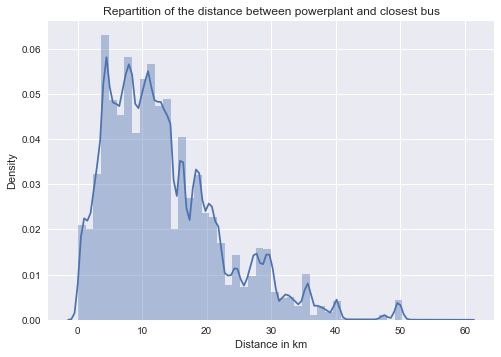

In [15]:
sns.set(color_codes=True)

limit = 60
print('Number of points under {0} km : {1}'
      .format(limit,df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km <= limit].count()))
print('Number of points above {0} km : {1}'
      .format(limit,df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km > limit].count()))

sns.distplot(df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km <= limit])
sns.plt.title('Repartition of the distance between powerplant and closest bus')
sns.plt.xlabel('Distance in km')
sns.plt.ylabel('Density')

In [16]:
df_bus_capacity_solar = df_all_powerplants[df_all_powerplants.energy_source == 'Solar'].groupby(['bus_id'], as_index=False)['electrical_capacity'].sum()

In [17]:
df_bus_capacity_solar.to_csv('capacity_solar_by_bus.csv')

In [18]:
df_bus_capacity_wind = df_all_powerplants[df_all_powerplants.energy_source == 'Wind'].groupby(['bus_id'], as_index=False)['electrical_capacity'].sum()

In [19]:
df_bus_capacity_wind.to_csv('capacity_wind_by_bus.csv')

In [21]:
# df_bus_capacity.electrical_capacity.describe()

In [23]:
# limit_capa = 4000
# print('Number of points under {0} MW : {1}'
#       .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa].count()))
# print('Number of points above {0} MW : {1}'
#       .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity > limit_capa].count()))

# sns.distplot(df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa])
# sns.plt.title('Repartition of the electrical capacity by bus')
# sns.plt.xlabel('Electrical capacity in MW')
# sns.plt.ylabel('Density')

## Add capacity to bus csv

In [24]:
path = 'reseau/buses_formatted.csv'
buses = pd.read_csv(path, index_col=0)
buses.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat
0,1,2,380.0,f,Substation,43.714600,36.129002
1,2,3,380.0,f,Substation,43.967285,35.460670
2,3,4,380.0,f,Substation,44.813232,31.456782
3,4,5,380.0,f,Substation,43.967285,32.184911
4,5,6,380.0,f,Substation,44.011230,32.704111


In [25]:
df_bus_capacity_solar.rename(columns={'electrical_capacity':'electrical_capacity_solar'}, inplace=True)
df_bus_capacity_wind.rename(columns={'electrical_capacity':'electrical_capacity_wind'}, inplace=True)

In [26]:
df_bus_capacity_solar.head()

,bus_id,electrical_capacity_solar
0,1,225.12687
1,26,40.00000
2,98,29.47377
3,129,20.00000
4,130,40.00000


In [27]:
df_bus_capacity_wind.head()

,bus_id,electrical_capacity_wind
0,67,6.325
1,72,84.300
2,76,82.000
3,77,2.400
4,99,167.600


In [28]:
buses_merged = buses.merge(df_bus_capacity_solar, how='left', on='bus_id').fillna(value=0.)
buses_merged.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat,electrical_capacity_solar
0,1,2,380.0,f,Substation,43.714600,36.129002,225.12687
1,2,3,380.0,f,Substation,43.967285,35.460670,0.00000
2,3,4,380.0,f,Substation,44.813232,31.456782,0.00000
3,4,5,380.0,f,Substation,43.967285,32.184911,0.00000
4,5,6,380.0,f,Substation,44.011230,32.704111,0.00000


In [29]:
buses_merged = buses_merged.merge(df_bus_capacity_wind, how='left', on='bus_id').fillna(value=0.)
buses_merged.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat,electrical_capacity_solar,electrical_capacity_wind
0,1,2,380.0,f,Substation,43.714600,36.129002,225.12687,0.0
1,2,3,380.0,f,Substation,43.967285,35.460670,0.00000,0.0
2,3,4,380.0,f,Substation,44.813232,31.456782,0.00000,0.0
3,4,5,380.0,f,Substation,43.967285,32.184911,0.00000,0.0
4,5,6,380.0,f,Substation,44.011230,32.704111,0.00000,0.0


In [30]:
buses_merged.to_csv('buses_formatted_with_capacity.csv')

In [31]:
# limit_capa = 4000
# print('Number of points under {0} MW : {1}'
#       .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa].count()))
# print('Number of points above {0} MW : {1}'
#       .format(limit_capa,df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity > limit_capa].count()))

# sns.distplot(df_bus_capacity.electrical_capacity[df_bus_capacity.electrical_capacity <= limit_capa])
# sns.plt.title('Repartition of the electrical capacity by bus')
# sns.plt.xlabel('Electrical capacity in MW')
# sns.plt.ylabel('Density')

NameError: name 'df_bus_capacity' is not defined